# Moore-Penrose pseudo inverse

In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.

In [3]:
def my_pinv1(A):
  U, s, VT = np.linalg.svd(A)
  # s_inv = np.linalg.inv(s)
  s[s>0] = 1 / s[s>0]
  pinv = VT.transpose() @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.transpose()
  pinv = np.matmul(VT.transpose(), np.matmul(la.diagsvd(s, A.shape[1], A.shape[0]), U.transpose()))
  return pinv


Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.

In [4]:
def my_pinv2(A):
  U, s, VT = np.linalg.svd(A, full_matrices=False)
  # s_inv = np.linalg.inv(s)
  s[s>0] = 1 / s[s>0]
  pinv = np.matmul(VT.transpose(), np.matmul(np.diag(s), U.transpose()))
  return pinv

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).

In [5]:
A = np.random.randn(5,4)
pinv_1 = np.linalg.pinv(A)
pinv_2 = my_pinv1(A)
pinv_3 = my_pinv2(A)
print(pinv_1[1], pinv_2[1], pinv_3[1])
np.linalg.norm(pinv_1 - pinv_2), np.linalg.norm(pinv_1 - pinv_3)


[ 0.9024755   0.34698618  0.27158086  0.29790388 -0.14725547] [ 0.9024755   0.34698618  0.27158086  0.29790388 -0.14725547] [ 0.9024755   0.34698618  0.27158086  0.29790388 -0.14725547]


(0.0, 0.0)

Compare the three implementations performances through the Google Colab magic command `%timeit`.

In [6]:
%timeit np.linalg.pinv(A)

51.1 µs ± 542 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit my_pinv1(A)

99.4 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit my_pinv2(A)

38.3 µs ± 495 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Least-square regression

Consider the linear model
$$
y = mx + q.
$$
where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.

(100,)
(100,)


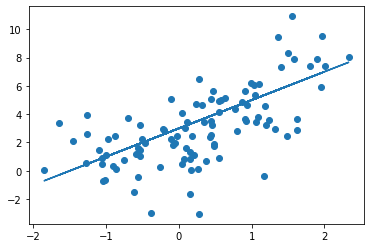

In [9]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m*X + q + noise * np.random.randn(N)
print(X.shape)
print(Y.shape)
plt.scatter(X,Y)
plt.plot(X, m*X + q)

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem
$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$
and display the regression line superimposed to the noisy data and the exact model.

Repeat the excercise by solving the normal equations. Compare the results

2.002719693454949 3.0881412437917124


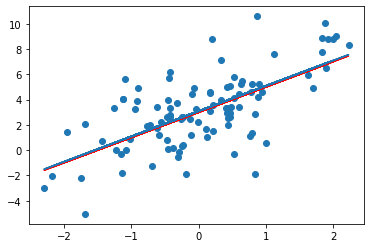

In [88]:
Phi = np.block([X[:,None], np.ones((N,1))])
# print(Phi)
w_LS = my_pinv2(Phi) @ Y
m_LS = w_LS[0]
q_LS = w_LS[1]
print(m_LS, q_LS)

plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')
plt.plot(X, m_LS*X + q_LS)



# Ridge regression and Kernel regression

Consider the function
$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.

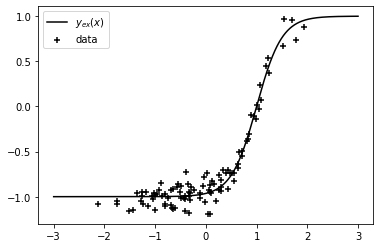

In [89]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2*(x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)


N_test = 1000
X_test = np.linspace(-3,3,N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.

0.47905900292961945 -0.6773606346118906


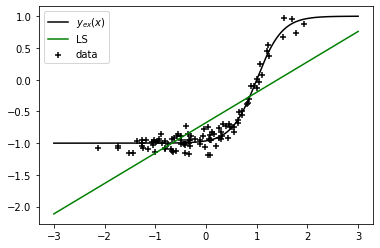

In [90]:
Phi = np.block([X[:,None], np.ones((N,1))])
w_LS = my_pinv2(Phi) @ Y
m_LS = w_LS[0]
q_LS = w_LS[1]
print(m_LS, q_LS)

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, m_LS*X_test + q_LS, color = 'green', label = "LS")
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.

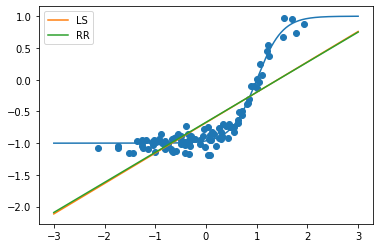

In [91]:
lam = 1.0
Phi = np.block([X[:,None], np.ones((N,1))])
alpha = np.linalg.solve(Phi @ Phi.transpose() + lam * np.identity(N), Y)
w_RR = Phi.transpose() @ alpha
Phi_test = np.block([X_test[:,None], np.ones((N_test,1))])
Y_test_RR = Phi_test @ w_RR
plt.scatter(X,Y)
plt.plot(X_test, Y_test_ex)
plt.plot(X_test, m_LS*X_test + q_LS, label = "LS")
plt.plot(X_test, Y_test_RR, label = "RR")
plt.legend()


Consider now **kernel regression**. 

1. Consider first the scalar product kernel 
$$K(x_i,x_j) = x_i x_j + 1.$$
Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
$$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
$$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$

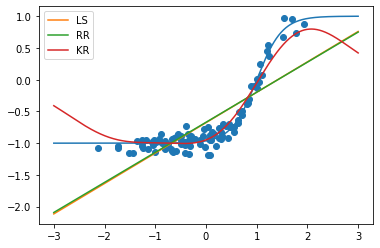

In [98]:
def kernel(xi, xj):
    #return xi*xj + 1
    #return (xi*xj + 1)**2
    return np.exp(-((xi-xj)**2)/(2*(1**2)))

K = np.array([[kernel(X[i], X[j]) for i in range(N)] for j in range(N)])
alpha = np.linalg.solve(K + lam * np.identity(N), Y)
K_test = np.array([[kernel(X_test[i], X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha
plt.scatter(X,Y)
plt.plot(X_test, Y_test_ex)
plt.plot(X_test, m_LS*X_test + q_LS, label = "LS")
plt.plot(X_test, Y_test_RR, label = "RR")
plt.plot(X_test, Y_test_KR, label = "KR")
plt.legend()
